### Part 3 (real datasets experiments)

In the beginning, we load and prepare the datasets. Later, we compare implemented IRLS method with others, already available. We also look at the differences in performance of the model with and without interactions.

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11,9)})
import warnings
warnings.filterwarnings('ignore')
from utils import run_experiments_part3, make_boxplot_part3

##### Dataset 1

In [2]:
data = load_breast_cancer()
df_breast = pd.DataFrame(data.data, columns=data.feature_names)
df_breast['target'] = data.target
#here all data is numeric, no categorical data

In [3]:
df_breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
#check various unique values in each column
for col in df_breast.columns:
    print(col, len(df_breast[col].unique()))

mean radius 456
mean texture 479
mean perimeter 522
mean area 539
mean smoothness 474
mean compactness 537
mean concavity 537
mean concave points 542
mean symmetry 432
mean fractal dimension 499
radius error 540
texture error 519
perimeter error 533
area error 528
smoothness error 547
compactness error 541
concavity error 533
concave points error 507
symmetry error 498
fractal dimension error 545
worst radius 457
worst texture 511
worst perimeter 514
worst area 544
worst smoothness 411
worst compactness 529
worst concavity 539
worst concave points 492
worst symmetry 500
worst fractal dimension 535
target 2


In [5]:
# check if there are any missing values
df_breast.isnull().sum() #no missing values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [6]:
#removing collinear variables
cor_matrix = df_breast.corr().abs()
upper_tri = cor_matrix.where(np.triu(cor_matrix, k=1).astype(np.bool))
# drop columns with correlation > 0.9
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.9)]
print(len(to_drop)) # 10 found to be dropped
df_breast_without_collinear = df_breast.drop(to_drop, axis=1)
print(df_breast_without_collinear.shape) 

10
(569, 21)


##### Dataset 2

In [7]:
df_images = pd.read_csv('data_banknote_authentication.txt', header=None)
df_images.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'target']
#check various unique values in each column
for col in df_images.columns:
    print(col, len(df_images[col].unique()))

variance 1338
skewness 1256
curtosis 1270
entropy 1156
target 2


In [8]:
df_images.dtypes #all data numerical

variance    float64
skewness    float64
curtosis    float64
entropy     float64
target        int64
dtype: object

In [9]:
df_images.isnull().sum() #no missing values

variance    0
skewness    0
curtosis    0
entropy     0
target      0
dtype: int64

In [10]:
#removing collinear variables
cor_matrix = df_images.corr().abs()
upper_tri = cor_matrix.where(np.triu(cor_matrix, k=1).astype(np.bool))
# drop columns with correlation > 0.9
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.9)]
print(to_drop) #no collinear variables found

[]


##### Comparison between methods

Results for the first dataset

In [11]:
acc_all_brest, prec_all_breast, rec_all_breast, f1_all_breast = run_experiments_part3(df_breast_without_collinear.drop('target', axis=1), df_breast_without_collinear['target'])

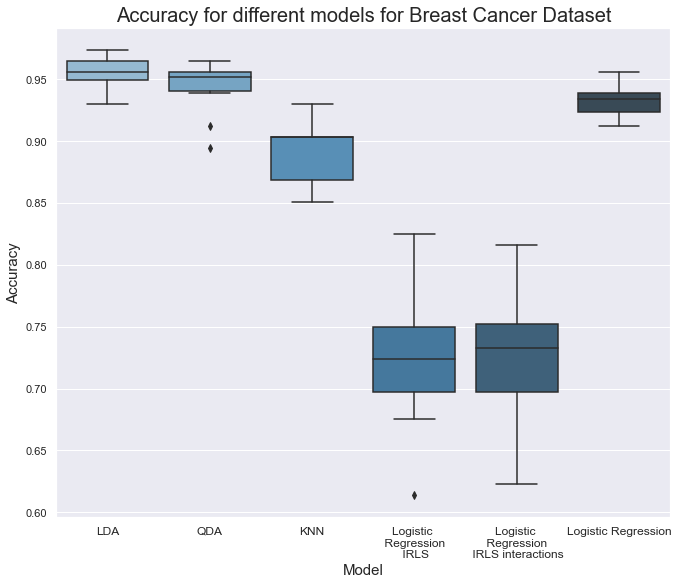

In [12]:
make_boxplot_part3(acc_all_brest, 'Accuracy', 'Breast Cancer Dataset')

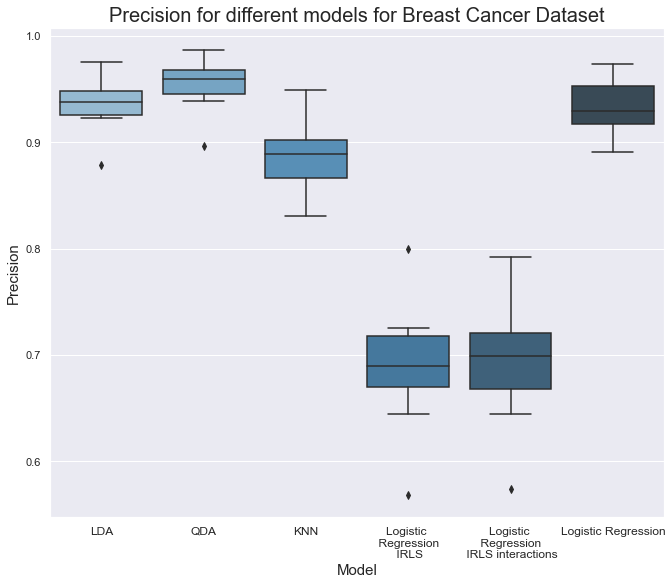

In [13]:
make_boxplot_part3(prec_all_breast, 'Precision', 'Breast Cancer Dataset')

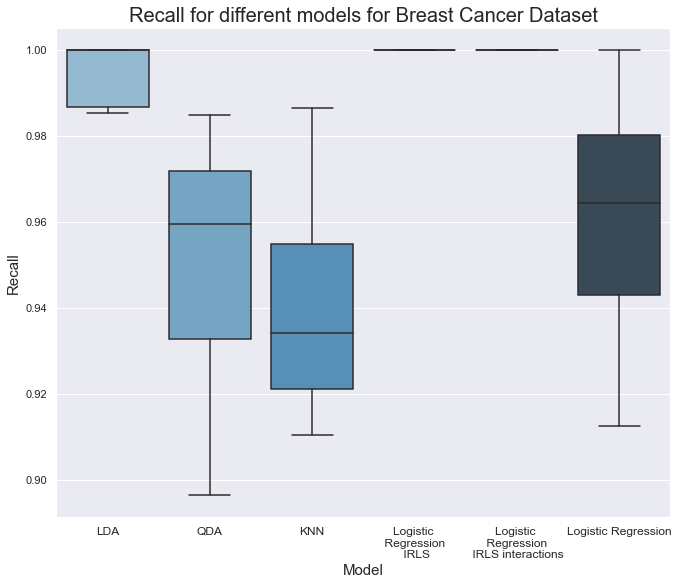

In [14]:
make_boxplot_part3(rec_all_breast, 'Recall', 'Breast Cancer Dataset')

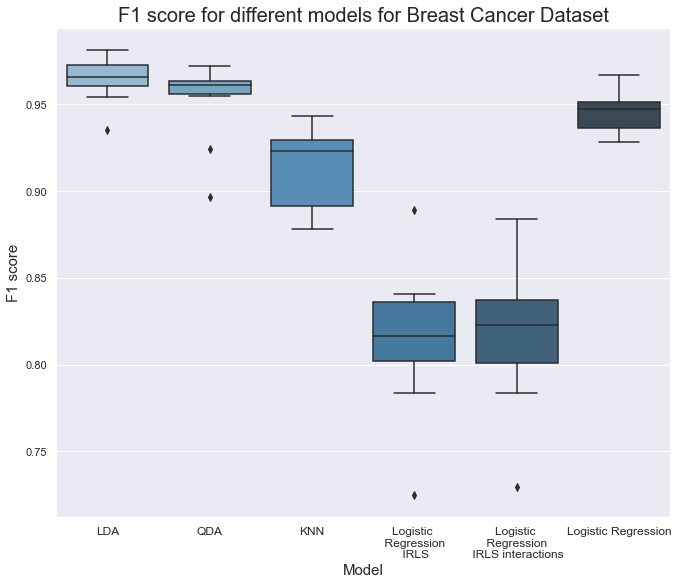

In [15]:
make_boxplot_part3(f1_all_breast, 'F1 score', 'Breast Cancer Dataset')

Results for the second dataset

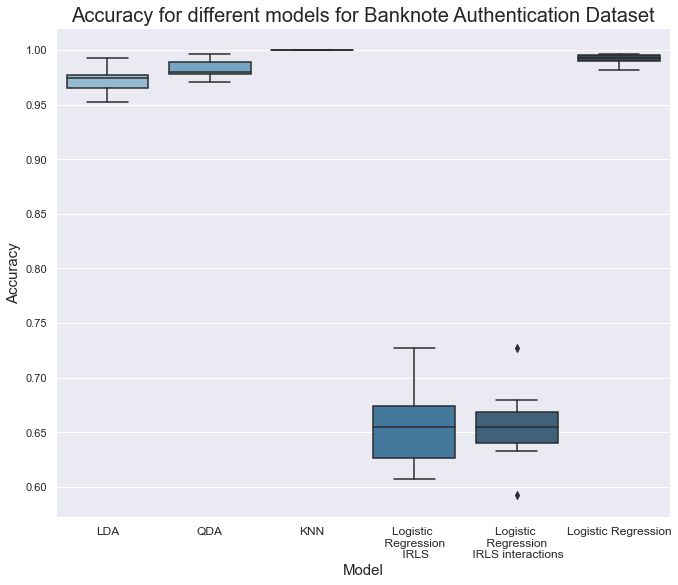

In [16]:
acc_all_images, prec_all_images, rec_all_images, f1_all_images = run_experiments_part3(df_images.drop('target', axis=1), df_images['target'])
make_boxplot_part3(acc_all_images, 'Accuracy', 'Banknote Authentication Dataset')

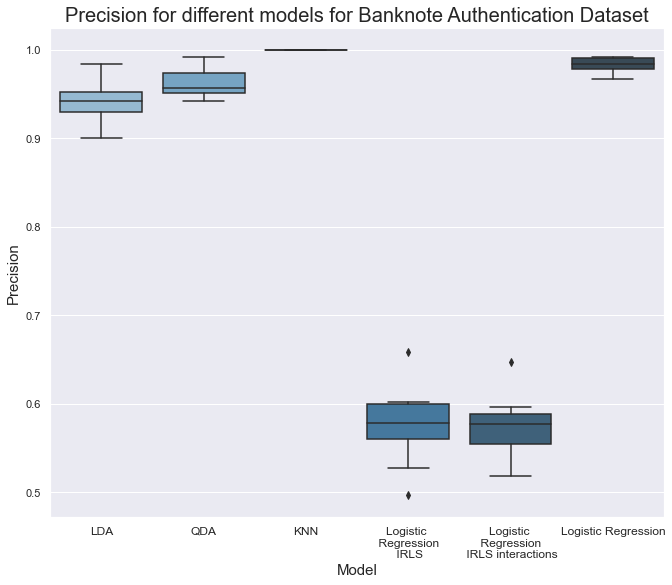

In [17]:
make_boxplot_part3(prec_all_images, 'Precision', 'Banknote Authentication Dataset')

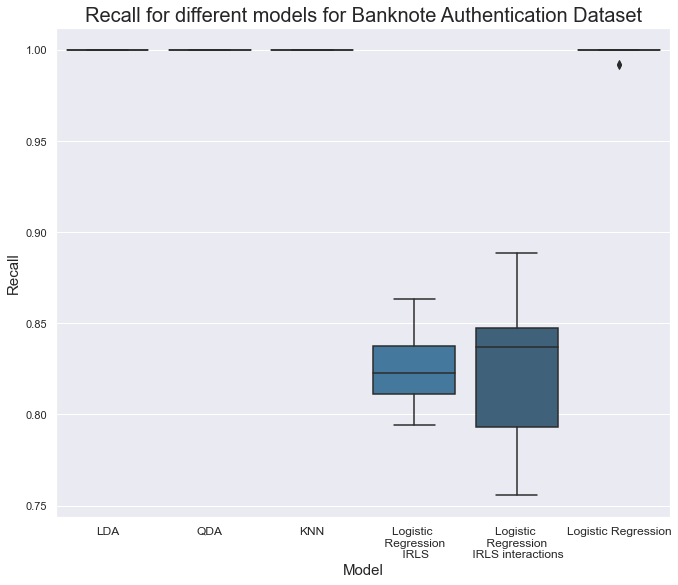

In [18]:
make_boxplot_part3(rec_all_images, 'Recall', 'Banknote Authentication Dataset')

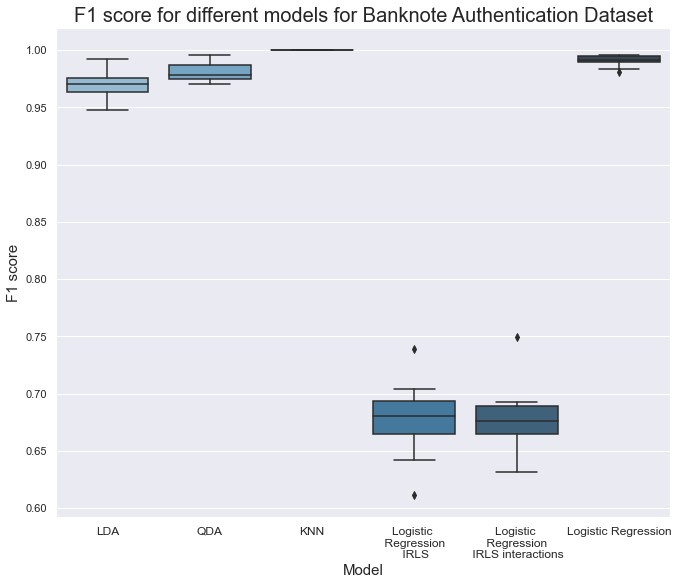

In [19]:
make_boxplot_part3(f1_all_images, 'F1 score', 'Banknote Authentication Dataset')